### Deriving the Verlet Integration Formula
Let $t_0, t_1,\dots$ be equally spaced in fixed increments of $\Delta t$. We can approximate the forward $x_{n+1}=x(t_n+\Delta t)$ of $x_n=x(t_n)$ with a [[Series|Taylor Series]] about $x_n$:
$$x_{n+1} = x_n + v_{n}\Delta t+\frac{1}{2}a_{n}\Delta t^2+\frac{1}{6}b_n \Delta t^3 + \mathcal O(\Delta t^4)$$
	Where $\mathcal O(\Delta t^4)$ is the error term. Since $\Delta t$ is very small the [[Growth of Functions|upper bound]] of the error will be $\Delta t$ raised to the smallest power we're not computing. In practice the jerk term in a Taylor expansion is often not calculated in which case the error would be  $\mathcal O(\Delta t^3)$)
The Taylor series expansion about $x_n$ for the backward $x_{n-1}=x(t_n-\Delta t)$ is 
$$x_{n-1} = x_n - v_n\Delta t+\frac{1}{2}a_n\Delta t^2-\frac{1}{6}b_n \Delta t^3 + \mathcal O(\Delta t^4)\dots$$
If we add them together, then solve for $x_{n+1}$, the first and third order terms (velocity and jerk) and in general all odd degree terms cancel out and we get the recurrence
$$x_{n+1}=2x_n-x_{n-1} + a_n\Delta t^2+\mathcal{O}(\Delta t^4).$$
As we can see, the symmetry of $x_{n+1}$ and $x_{n-1}$ with respect to $x_n$ allows us to calculate $x_{n+1}$ without calculating velocity. Furthermore, all odd terms (half of all terms) in the error disappear, so Verlet integration is an order more accurate than simple Taylor expansion about $x_n$. 

This recurrence is perfect for solving differential equations of the form
$$\ddot x=A(x(t))$$
because we do not need to calculate any velocities.

---
### Verlet Integration as an Approximation of a Second Order Derivative
Recall Euler's Method which approximates the solution through the recurrence 
$$x_{n+1}=x_n+f(t_n,x_n)(t_{n+1}-t_n).$$
We can rearrange the equation to say
$$\frac{\Delta x}{\Delta t}=\frac{x_{n+1}-x_n}{t_{n+1}-t_n}=f(t_n,x_n)=\frac{dx}{dt}$$
In this form, we can see that Euler's method is really derived from the *forward difference* approximation of the first derivative. When given a first order differential equation with initial conditions we can use this approximation to approximate $x_{n+1}$. 

Rearranging the equation for Verlet integration, we get
$$\frac{x_{n+1}-2x_n+x_{n-1}}{\Delta t^2}=a_n$$
which we can rewrite as
$$\frac{\Delta^2 x_n}{\Delta t^2}=\frac{(x_{n+1} - x_n) - (x_n-x_{n-1})}{\Delta t^2}=a ~~~~~ \mathbf{(1)}$$
or, to emphasis that we are taking a difference of differences, we can write it as
$$\frac{\Delta^2 x_n}{\Delta t^2}=\frac{\frac{(x_{n+1} - x_n)}{\Delta t} - \frac{(x_n-x_{n-1})}{\Delta t}}{\Delta t}=a_n$$
The central difference of $x(t_n)$ is
$$\delta x(t_n)=x(t_n+\Delta t) - x(t_n - \Delta t)=x_{n+1}-x_{n-1}$$
The second order central difference is a difference of differences
$$\begin{matrix}\delta^2 x(t_n) & = & \delta x(t_n + \Delta t)-\delta x(t_n - \Delta t) \\ & = & (x(t_n+2\Delta t)- x(t_n))-(x(t_n)-x(t_n-2\Delta t)) \\ & = & (x_{n+1}-x_{n})-(x_n - x_{n-1})\end{matrix}$$
(for the sake of simplicity, assume that for central differences, $2\Delta t \approx \Delta t$).
As we can see, the numerator of $\mathbf{(1)}$ is the central difference of $x$. 
Hence, we can say that **Verlet integration** is a central difference approximation of the second derivative of $x$. When, given a second order differential equation of the form $\ddot x = A(x(t))$ and initial conditions, we can use this approximation to approximate $x_{n+1}$. 

---
### Computing Velocity
The velocities are not explicitly given in the basic Verlet equation, but are often necessary for calculations of certain physical quantities like *kinetic energy*. This deficiency in the equation can be dealt with using the *velocity Verlet* algorithm, or with the *mean value theorem* as
$$v_n=\frac{x_{n+1}-x_{n-1}}{2\Delta t} + \mathcal O(\Delta t^2))$$

---
### Velocity Verlet
A more commonly used algorithm is the velocity Verlet algorithm. It is similar to the previous method, but it computes both $x_{n+1}$ and $v_{n+1}$ at the same step. Since we're computing velocity, we can use the Taylor Series approximation of $x_{n+1}$ 
$$x_{n+1}=x_n + v_n\Delta t + a_n\Delta t^2.$$
$$v_{n+1}=v_n + \frac{a_n + a_{n+1}}{2}\Delta t.$$
When calculating velocity $v_{n+1}$, we can take the average of $a_n$ and $a_{n+1}$ for better precision. Note however that this is only possible if $A$ depends only on $x$ and not $v$. Otherwise, just use $a_n$. In this respect. the velocity Verlet algorithm where $v_{n+1}=v_n + a_n\Delta t.$ is more flexible than our previous algorithm as we can now compute solutions to differential equations of the form
$$\ddot x = A(x, v)$$



---
If we've found the solution, using Verlet integration for the interval $[t_0, t_k]$ and we want to find the solution in interval $[t_k, t_s]$, then we can have the Verlet algorithm start with initial conditions $t_k$, $x_k$ and $v_k$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [14]:
def graph(xs, ts, title='Solution'):
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(ts, xs, label='x(t)')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('t')
    plt.ylabel('x')
    
    plt.legend()
    
    plt.grid(True)
    plt.show()

In [27]:
def graph_comparison(xs1, ts1, xs2, ts2, label='x(t)', title=''):
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(ts1, xs1, label=label)
    ax1.set_xlabel('t')
    ax1.set_ylabel('x')
    ax1.grid(True)

    ax2.plot(ts2, xs2, label=label)
    ax2.set_xlabel('t')
    ax2.set_ylabel('x')
    ax2.grid(True)

    fig.suptitle(title, fontsize=12)

    ax1.legend()
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [4]:
def solve_euler(x0, start, end, f, num_samples=1000):
    Dt = (end - start) / (num_samples-1)
    t = np.linspace(start, end, num_samples).tolist()
    x = [x0]
    for i in range(num_samples-1):
        x0 = x0 + Dt*f(x0, t[i])
        x.append(x0)
    return (x, t)

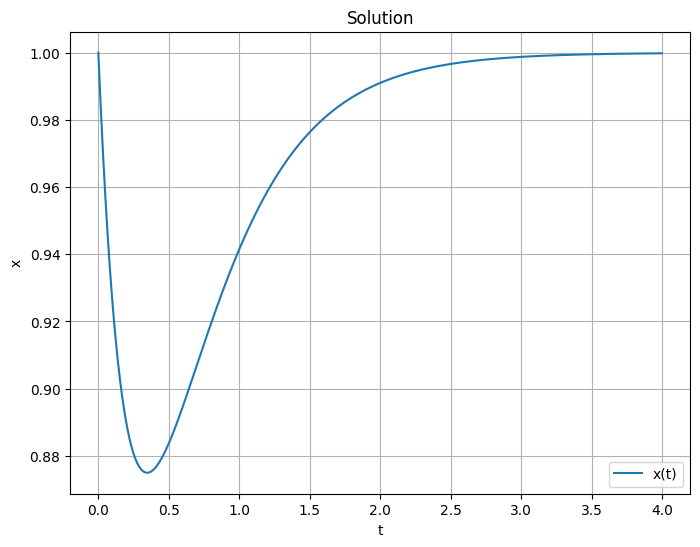

In [5]:
def dydt(y, t):
    return 2 - e**(-4*t) - 2*y

num_samples = 100000
start = 0
end = 4
x0 = 1

sol, ts = solve_euler(x0, start, end, dydt, num_samples=num_samples)
graph(sol, ts)


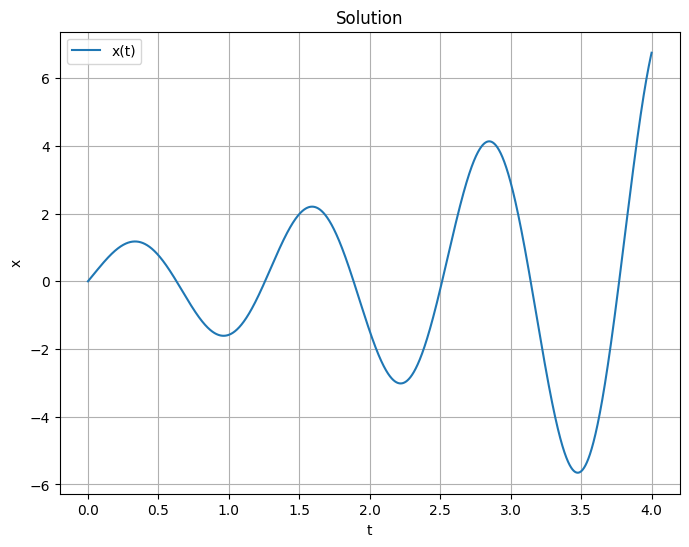

In [6]:
def dydt(y, t):
    return y- 0.5*e**(t*0.5)*np.sin(5*t) + 5*e**(t*0.5)*np.cos(5*t)

num_samples = 100000
start = 0
end = 4
x0 = 0

sol, ts = solve_euler(x0, start, end, dydt, num_samples=num_samples)
graph(sol, ts)


In [7]:
def solve_verlet(x0, v0, start, end, f, num_samples=1000):
    Dt = (end - start) / (num_samples-2)
    ts = np.linspace(start, end, num_samples).tolist()
    xs = [x0]
    vs = [v0]
    # x1 is approximated with a Taylor Series
    x1 = x0 + v0*Dt + 0.5*(Dt**2)*f(x0, start)
    xs.append(x1)
    for i in range(num_samples-2):
        x0 = xs[i]
        x1 = 2*x1 - x0 + (Dt**2)*f(x0, ts[i])
        v = (x1 - x0) / (2*Dt)
        xs.append(x1)
        vs.append(v)
    # Taylor expansion about v_n-1 for v_n
    vs.append(vs[-1] + Dt*f(x1, ts[-1]))
    return (xs, vs, ts)

In [8]:
def velocity_verlet(x0, v0, start, end, f, num_samples=1000):
    Dt = (end - start) / (num_samples-2)
    ts = np.linspace(start, end, num_samples).tolist()
    xs = [x0]
    vs = [v0] 
    for i in range(num_samples-1):
        a0 = f(x0, start)
        x0 = x0 + Dt*v0 + (Dt**2)*a0
        start += Dt
        v0 = v0 + Dt*a0
        xs.append(x0)
        vs.append(v0)
    return (xs, vs, ts)


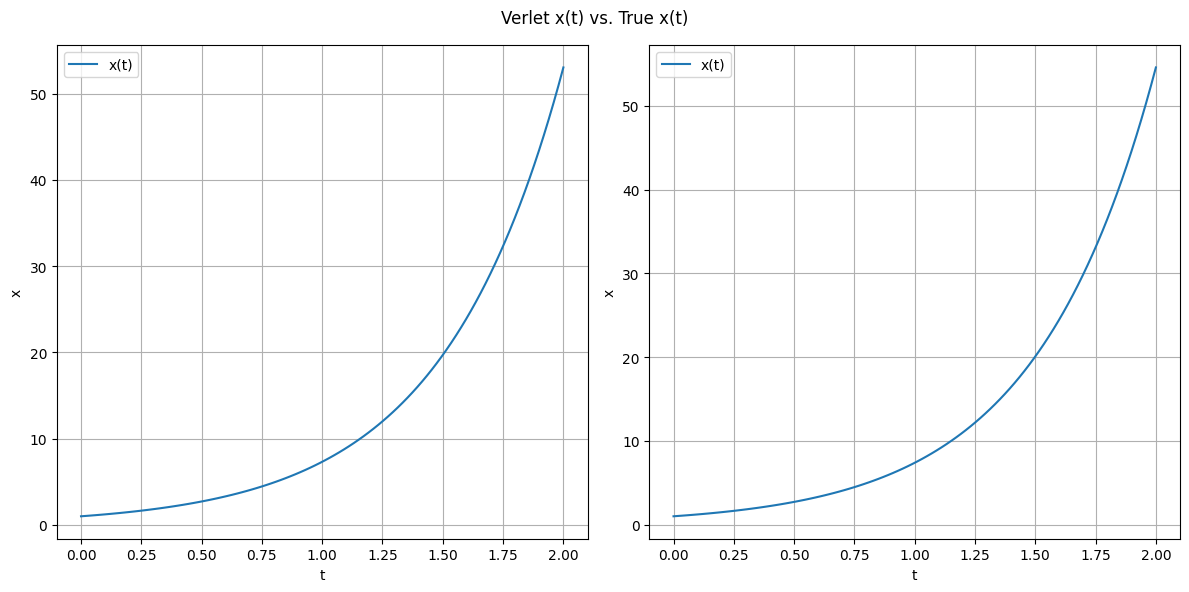

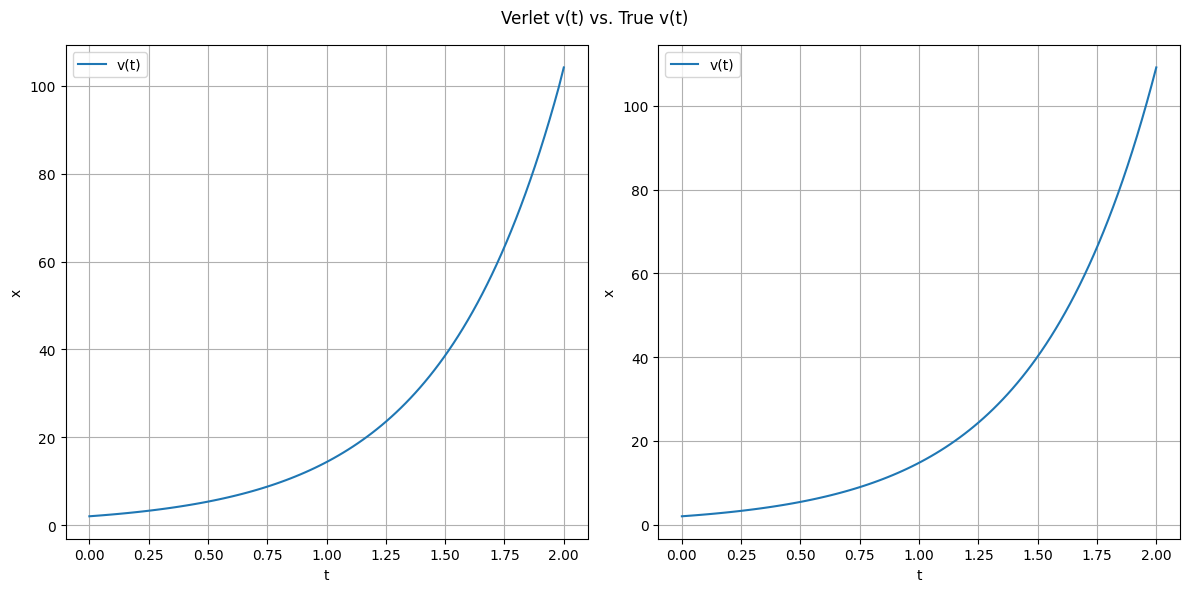

In [20]:
def second_order_exp(x, t):
    return 4*x

num_samples = 100
x0 = 1
v0 = 2
start = 0
end = 2

sol_approx, vel_approx, ts = solve_verlet(x0, v0, start, end, second_order_exp, num_samples=num_samples)

ts = np.linspace(start, end, num_samples)
sol = [e**(2*t) for t in ts]
vel = [2*e**(2*t) for t in ts]

graph_comparison(sol_approx, ts, sol, ts, title='Verlet x(t) vs. True x(t)')
graph_comparison(vel_approx, ts, vel, ts, label='v(t)', title='Verlet v(t) vs. True v(t)')

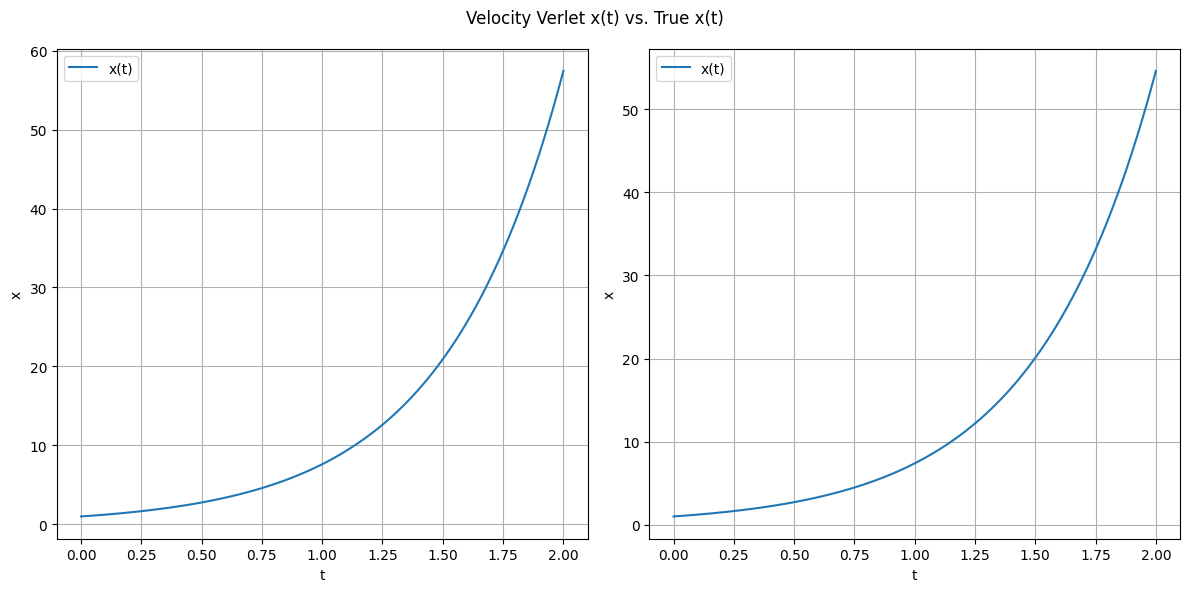

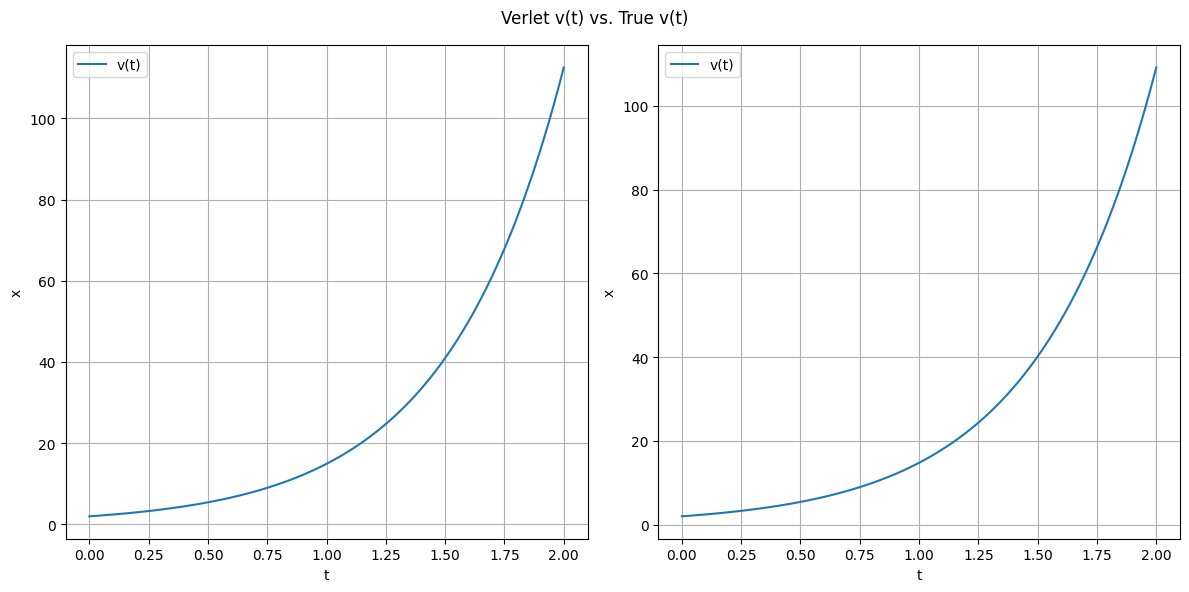

In [21]:
sol_vapprox, vel_vapprox, ts = velocity_verlet(x0, v0, start, end, second_order_exp, num_samples=num_samples)
graph_comparison(sol_vapprox, ts, sol, ts, label='x(t)', title='Velocity Verlet x(t) vs. True x(t)')
graph_comparison(vel_vapprox, ts, vel, ts, label='v(t)', title='Verlet v(t) vs. True v(t)')

In [12]:
# At sufficiently small steps, the error values are very small
error0 = [abs((a - b)/a) for a, b in zip(sol, sol_approx)]
fmtted = [f"{num:.4f}" for num in error0]
print("Error Percentages for x:", ", ".join(fmtted[:20]))

print('')

error1 = [abs((a - b)/a) for a, b in zip(vel, vel_approx)]
fmtted = [f"{num:.4f}" for num in error1]
print("Error Percentages for v:", ", ".join(fmtted[:20]))
# largest error is 4.5%
print("Last couple errors, to see how error grows:", ", ".join(fmtted[-2:]))

print('')

error2 = [abs((a - b)/a) for a, b in zip(sol, sol_vapprox)]
fmtted = [f"{num:.4f}" for num in error2]
print("Error Percentages for velocity Verlet x:", ", ".join(fmtted[:20]))

print('')

error3 = [abs((a - b)/a) for a, b in zip(vel, vel_vapprox)]
fmtted = [f"{num:.4f}" for num in error3]
print("Error Percentages for velocity Verlet v:", ", ".join(fmtted[:20]))
print("Last couple errors to see how error grows:", ", ".join(fmtted[-2:]))


Error Percentages for x: 0.0000, 0.0004, 0.0007, 0.0010, 0.0012, 0.0014, 0.0016, 0.0016, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0015, 0.0013, 0.0012, 0.0010, 0.0009, 0.0007, 0.0004

Error Percentages for v: 0.0000, 0.0004, 0.0015, 0.0026, 0.0037, 0.0047, 0.0056, 0.0065, 0.0074, 0.0082, 0.0090, 0.0097, 0.0104, 0.0111, 0.0118, 0.0125, 0.0131, 0.0137, 0.0143, 0.0149
Last couple errors, to see how error grows: 0.0476, 0.0456

Error Percentages for velocity Verlet x: 0.0000, 0.0012, 0.0023, 0.0034, 0.0045, 0.0054, 0.0064, 0.0073, 0.0081, 0.0090, 0.0098, 0.0105, 0.0113, 0.0120, 0.0127, 0.0133, 0.0140, 0.0146, 0.0152, 0.0158

Error Percentages for velocity Verlet v: 0.0000, 0.0004, 0.0007, 0.0010, 0.0012, 0.0014, 0.0015, 0.0016, 0.0017, 0.0017, 0.0017, 0.0016, 0.0015, 0.0014, 0.0013, 0.0012, 0.0010, 0.0008, 0.0006, 0.0004
Last couple errors to see how error grows: 0.0302, 0.0306


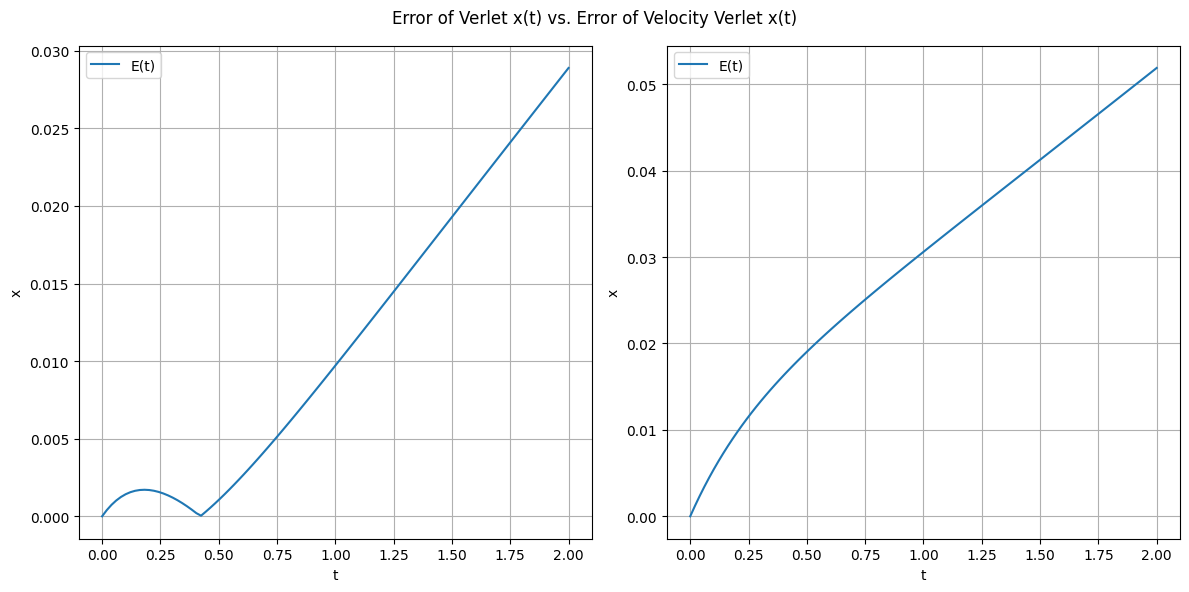

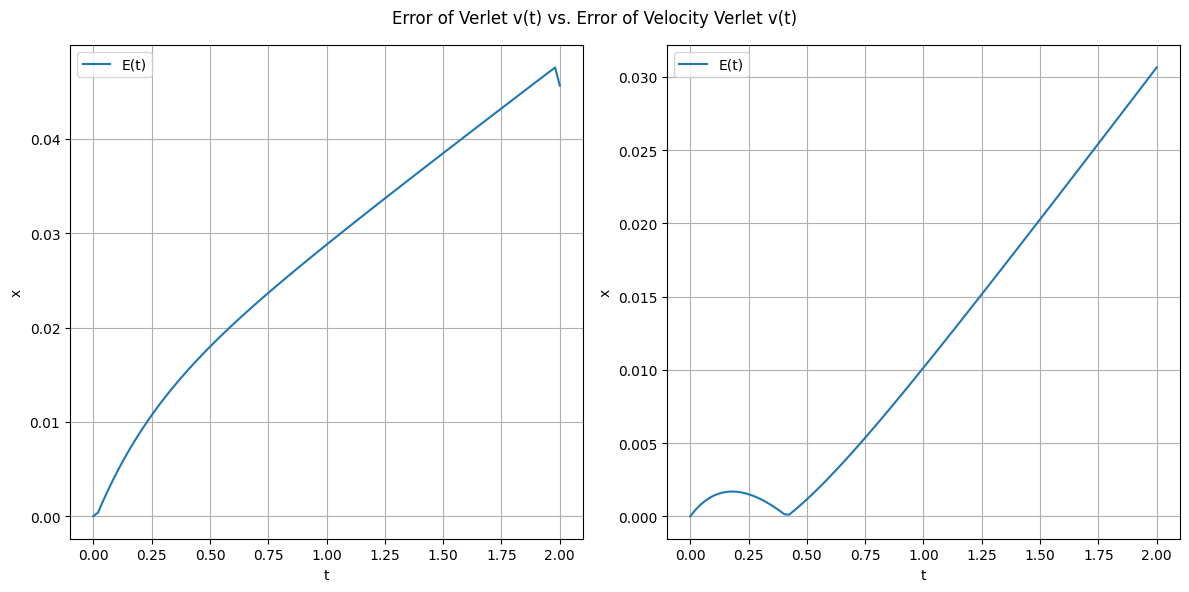

In [28]:
graph_comparison(error0, ts, error2, ts, label='E(t)', title='Error of Verlet x(t) vs. Error of Velocity Verlet x(t)')
graph_comparison(error1, ts, error3, ts, label='E(t)', title='Error of Verlet v(t) vs. Error of Velocity Verlet v(t)')

### Verlet vs Velocity Verlet
The velocity verlet algorithm uses a second degree Taylor expansion to approximate the solution. The error in such a Taylor expansion is an order greater than the error in the approximation used in regular Verlet integration. As shown above, this is indeed true.

However, the velocity Verlet algorithm uses a first degree Taylor expansion to approximate velocity, which has a smaller error than the mean value approximation used in regular Verlet integration.

In short, use `solve_verlet` for better approximations to the solution, but use `velocity_verlet` for better velocity approximations